In [157]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
merged_data = pd.merge(ride_data, city_data, on="city",how="left")

#Display the data table for preview
merged_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [158]:
# Create City Type Variables for Each City Type From Merged Data
urban_cities = merged_data.loc[merged_data["type"] == "Urban", :]

suburban_cities = merged_data.loc[merged_data["type"] == "Suburban", :]

rural_cities = merged_data.loc[merged_data["type"] == "Rural", :]

## Bubble Plot of Ride Sharing Data

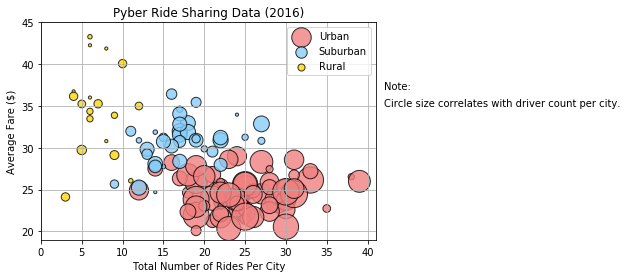

In [159]:
# Obtain the x and y coordinates for each of the three city types
urban_x = urban_cities.groupby("city")["ride_id"].count()
urban_y = urban_cities.groupby("city")["fare"].mean()
urban_driver_count = urban_cities.groupby("city")["driver_count"].mean()

suburban_x = suburban_cities.groupby("city")["ride_id"].count()
suburban_y = suburban_cities.groupby("city")["fare"].mean()
suburban_driver_count = suburban_cities.groupby("city")["driver_count"].mean()

rural_x = rural_cities.groupby("city")["ride_id"].count()
rural_y = rural_cities.groupby("city")["fare"].mean()
rural_driver_count = rural_cities.groupby("city")["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(urban_x, urban_y, s=10*urban_driver_count, marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.8, label="Urban")

plt.scatter(suburban_x, suburban_y, s=10*suburban_driver_count, marker="o", facecolors="lightskyblue", edgecolors="black", alpha=0.8, label="Suburban")

plt.scatter(rural_x, rural_y, s=10*rural_driver_count, marker="o", facecolors="gold", edgecolors="black", alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.grid(b=None, which='major', axis='both')

# Set the upper and lower limits of our x and y axis
plt.ylim(19,45)

plt.xlim(0,41)

# Create a legend
plt.legend()

# Create a title, x label, and y label for our chart
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare ($)")

# Incorporate a text label regarding circle size
plt.text(42, 37, "Note:")
plt.text(42, 35, "Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("../Images/PyberDataScatter.png")

In [160]:
# Show Graph
plt.show()

## Total Fares by City Type

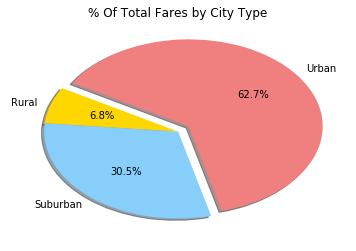

In [161]:
# Calculate Fare Totals
urban_fare_total = urban_cities["fare"].sum()
suburban_fare_total = suburban_cities["fare"].sum()
rural_fare_total = rural_cities["fare"].sum()

all_fare_total = merged_data["fare"].sum()

# Calculate Type Percents
urban_percent = round((urban_fare_total / all_fare_total) * 100, 1)
suburban_percent = round((suburban_fare_total / all_fare_total) * 100, 1)
rural_percent = round((rural_fare_total / all_fare_total) * 100, 1)

# Build Pie Chart

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [rural_percent, suburban_percent, urban_percent]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# Create Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)

# Create Pie Chart Title
plt.title("% Of Total Fares by City Type")

# Save Figure
plt.savefig("../Images/PyberDataFarePie.png")

In [162]:
# Show Figure
plt.show()

## Total Rides by City Type

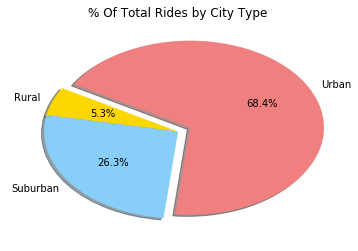

In [163]:
# Calculate Ride Counts
urban_ride_total = urban_cities["ride_id"].count()
suburban_ride_total = suburban_cities["ride_id"].count()
rural_ride_total = rural_cities["ride_id"].count()

all_ride_total = merged_data["ride_id"].count()

# Calculate Type Percents
urban_percent = round((urban_ride_total / all_ride_total) * 100, 1)
suburban_percent = round((suburban_ride_total / all_ride_total) * 100, 1)
rural_percent = round((rural_ride_total / all_ride_total) * 100, 1)

# Build Pie Chart

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [rural_percent, suburban_percent, urban_percent]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# Create Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)

# Create Pie Chart Title
plt.title("% Of Total Rides by City Type")

# Save Figure
plt.savefig("../Images/PyberDataRidePie.png")

In [164]:
# Show Figure
plt.show()

In [165]:
# Redefine City Type Variables from Original Data File
urban_cities = city_data.loc[city_data["type"] == "Urban", :]

suburban_cities = city_data.loc[city_data["type"] == "Suburban", :]

rural_cities = city_data.loc[city_data["type"] == "Rural", :]

## Total Drivers by City Type

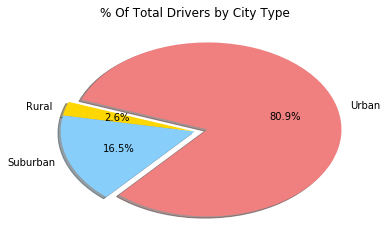

In [166]:
# Calculate Driver Totals
urban_drivers_total = urban_cities["driver_count"].sum()
suburban_drivers_total = suburban_cities["driver_count"].sum()
rural_drivers_total = rural_cities["driver_count"].sum()

all_drivers_total = city_data["driver_count"].sum()

# Calculate Type Percents
urban_percent = round((urban_drivers_total / all_drivers_total) * 100, 1)
suburban_percent = round((suburban_drivers_total / all_drivers_total) * 100, 1)
rural_percent = round((rural_drivers_total / all_drivers_total) * 100, 1)

# Build Pie Chart

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [rural_percent, suburban_percent, urban_percent]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# Create Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)

# Create Pie Chart Title
plt.title("% Of Total Drivers by City Type")

# Save Figure
plt.savefig("../Images/PyberDataDriverPie.png")

In [167]:
# Show Figure
plt.show()